In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
import os

from random import shuffle 
from tqdm import tqdm 
from PIL import Image
import warnings
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, multilabel_confusion_matrix, balanced_accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
print(os.listdir("C:\\Users\\user\\Documents\\year_project\\sneakers_images"))

In [8]:
data_path = "C:\\Users\\user\\Documents\\year_project\\sneakers_images\\MVP_images"
image_size = 128

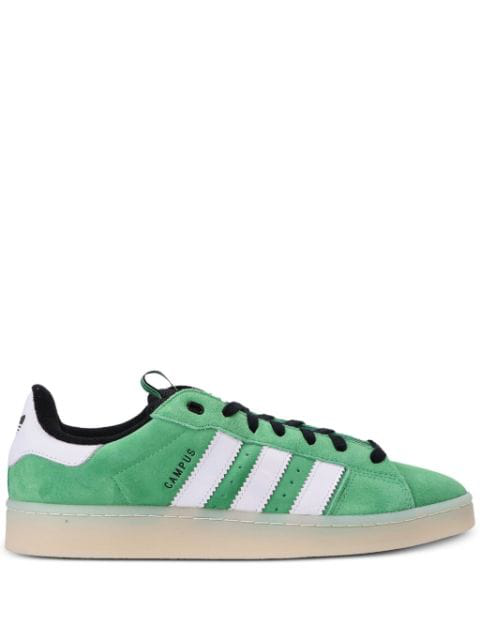

In [13]:
Image.open(data_path + "\\adidas_Campus_80&aposs_low-top_sneakers.jpg")

## Преобразование данных

In [17]:
images = [img for img in os.listdir(data_path) if img.endswith(".jpg")]

In [80]:
for image in tqdm(os.listdir(data_path)): 
    path = os.path.join(data_path, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)).flatten()   
    np_img=np.asarray(img)

100%|██████████| 398/398 [00:01<00:00, 377.74it/s]


In [96]:
def train_data():
    data_full = [] 
    for image1 in tqdm(os.listdir(data_path)): 
        path = os.path.join(data_path, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        data_full.append(img1) 
    return np.asarray(data_full)

In [97]:
data = train_data()

100%|██████████| 398/398 [00:00<00:00, 993.36it/s]


In [101]:
x_data = (data-np.min(data))/(np.max(data)-np.min(data))

In [106]:
y = []
for image in tqdm(os.listdir(data_path)):
    y.append(image.split('_')[0])

100%|██████████| 398/398 [00:00<00:00, 398599.09it/s]


In [113]:
x_data[0].sum()

14931.725490196079

In [116]:
x_data[55].sum()

13165.239215686273

In [119]:
y = pd.Series(y)

In [208]:
# наполненность классов
y.value_counts()

adidas    83
Nike      82
Vans      79
Jordan    77
New       77
Name: count, dtype: int64

In [118]:
dict_classes = {'adidas': 0, 'Nike': 1, 'Vans': 2,
                'Jordan': 3, 'New': 4}
y_data = y\
        .replace(dict_classes, regex=True)

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test.reshape(number_of_test,x_test.shape[1]*x_test.shape[2])

In [191]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train_flatten, y_train)

LogisticRegression(random_state=42)

In [199]:
log_acc_test = accuracy_score(log_reg.predict(x_test_flatten), y_test)
log_acc_train = accuracy_score(log_reg.predict(x_train_flatten), y_train)
print(f"Log reg accuracy train {round(log_acc_train, 2)}")
print(f"Log reg accuracy test {round(log_acc_test, 2)}")

Log reg accuracy train 0.99
Log reg accuracy test 0.66


In [200]:
svc = SVC(random_state=42)
svc.fit(x_train_flatten, y_train)

SVC(random_state=42)

In [201]:
svc_acc_test = accuracy_score(svc.predict(x_test_flatten), y_test)
svc_acc_train = accuracy_score(svc.predict(x_train_flatten), y_train)
print(f"SVC accuracy train {round(svc_acc_train, 2)}")
print(f"SVC accuracy test {round(svc_acc_test, 2)}")

SVC accuracy train 0.81
SVC accuracy test 0.65


In [206]:
lgbm = LGBMClassifier(random_state=42, verbose=-100)
lgbm.fit(x_train_flatten, y_train)

LGBMClassifier(random_state=42, verbose=-100)

In [207]:
lgbm_acc_test = accuracy_score(lgbm.predict(x_test_flatten), y_test)
lgbm_acc_train = accuracy_score(lgbm.predict(x_train_flatten), y_train)
print(f"SVC accuracy train {round(lgbm_acc_train, 2)}")
print(f"SVC accuracy test {round(lgbm_acc_test, 2)}")

SVC accuracy train 1.0
SVC accuracy test 0.68


Лучшее качество удалось получить на lgbm модели => MVP сервис будет строиться на ее основе

In [187]:
pickle.dump(lgbm, open('lgbm_skeakers.pkl', 'wb'))